# Chapter 8

In [31]:
import numpy as np
import pymc3 as pm
import matplotlib as plt
import seaborn as sns
import pandas as pd
import arviz as az

## Exercise 8H1

In [50]:
with pm.Model() as model:
    α = pm.Normal("α", 0, 1)
    β = pm.Cauchy("β", 0, 1) 
    y = pm.Normal("y", α + β, 1, observed=1)
    trace = pm.sample(draws=2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]
Sampling 4 chains, 0 divergences: 100%|██████████| 12000/12000 [00:02<00:00, 5164.73draws/s]
The acceptance probability does not match the target. It is 0.6901551554485631, but should be close to 0.8. Try to increase the number of tuning steps.


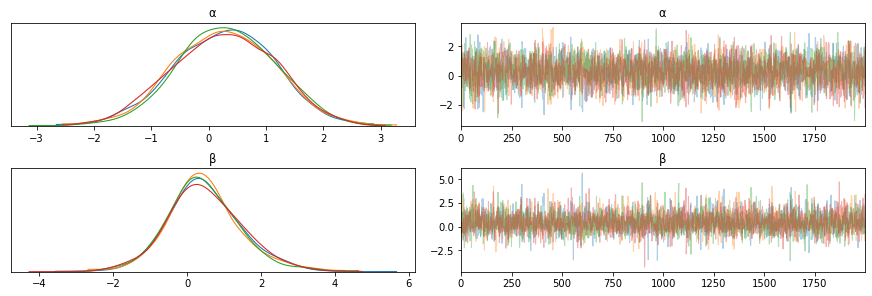

In [51]:
az.plot_trace(trace);

The distribution for $\beta$ is wider than that for $\alpha$. This is to be expected, since the tails of a Cauchy distribution are much heavier.

## Exercise 8H2

In [52]:
# TODO

## Exercise 8H3

In [3]:
def simulate(size):
    height = np.random.normal(10, 2, size=size)
    proportion = np.random.uniform(0.4, 0.5, size=size)
    left = proportion * height + np.random.normal(0, 0.02, size=size)
    right = proportion * height + np.random.normal(0, 0.02, size=size)
    return pd.DataFrame({"height": height, "left": left, "right": right})

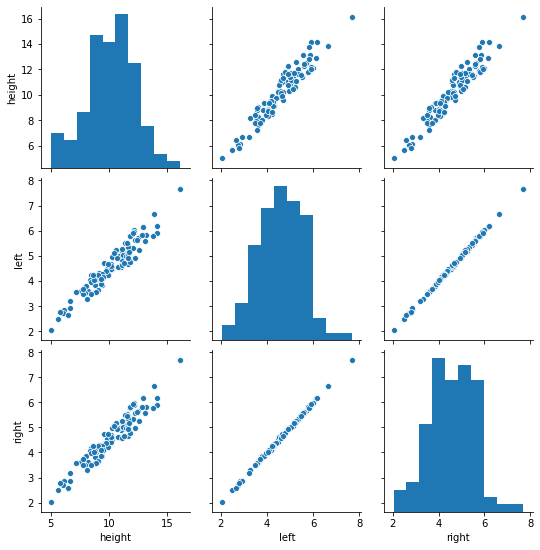

In [8]:
data = simulate(100)
sns.pairplot(data)

In [24]:
with pm.Model() as model5_8s:
    α = pm.Normal("α", 10, 100)
    β_left = pm.Normal("β_left", 2, 10)
    β_right = pm.Normal("β_right", 2, 10)
    μ = α + β_left * data.left.values + β_right * data.right.values
    σ = pm.Cauchy("σ", 0, 1)
    height = pm.Normal("height", μ, σ, observed=data.height.values)

In [23]:
with pm.Model() as model5_8s2:
    α = pm.Normal("α", 10, 100)
    β_left = pm.Normal("β_left", 2, 10)
    β_right = pm.math.maximum(pm.Normal("β_right", 2, 10), 0)
    μ = α + β_left * data.left.values + β_right * data.right.values
    σ = pm.Cauchy("σ", 0, 1)
    height = pm.Normal("height", μ, σ, observed=data.height.values)

In [29]:
trace5_8s = pm.sample(draws=2000, tune=1000, model=model5_8s,
                      start={"α": 10, "β_left": 0, "β_right": 0, "σ": 1})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, β_right, β_left, α]
Sampling 4 chains, 23 divergences: 100%|██████████| 12000/12000 [02:55<00:00, 68.34draws/s]
The acceptance probability does not match the target. It is 0.8855850845056008, but should be close to 0.8. Try to increase the number of tuning steps.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7126419377786626, but should be close to 0.8. Try to increase the number of tuning steps.


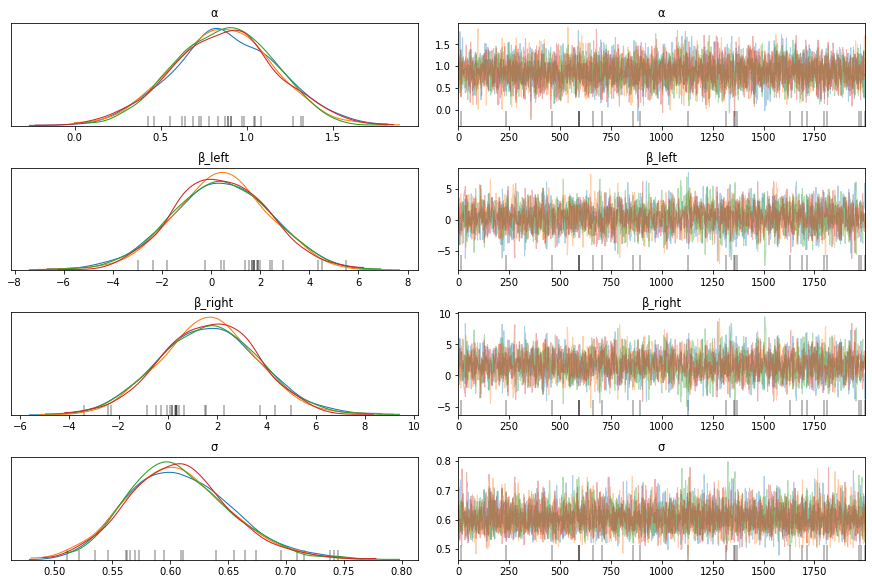

In [34]:
az.plot_trace(trace5_8s);

In [35]:
trace5_8s2 = pm.sample(draws=2000, tune=1000, model=model5_8s2,
                       start={"α": 10, "β_left": 0, "β_right": 0, "σ": 1})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, β_right, β_left, α]
Sampling 4 chains, 5,710 divergences: 100%|██████████| 12000/12000 [00:14<00:00, 846.62draws/s]
There were 1442 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1437 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1572 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1256 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


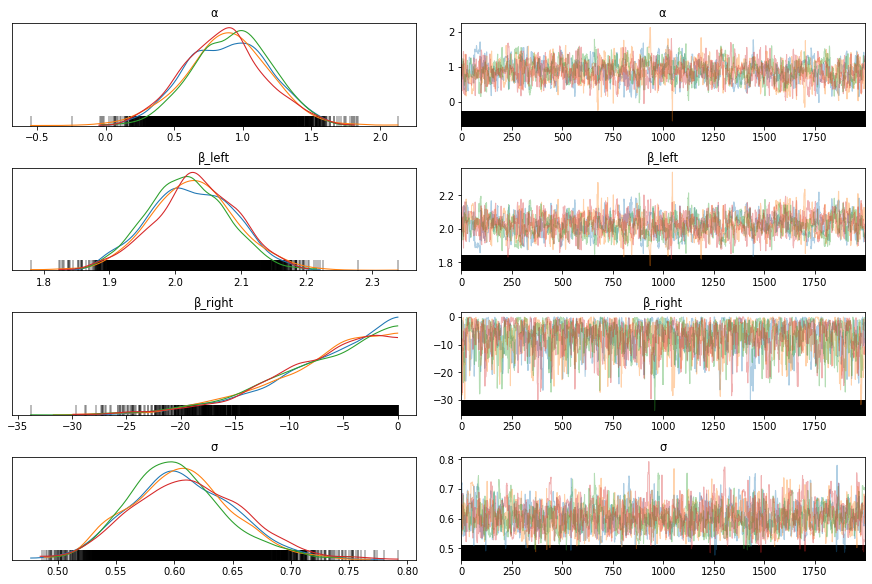

In [37]:
az.plot_trace(trace5_8s2);

In the second model $\beta_{right}$ is forced to not distribute to the regression, while the posterior for $\beta_{left}$ is much narrower around the correct value. The model is essentially ignoring the right-leg coefficient. It does not particularly care which value it has, which is reflected in the wide posterior.

## Exercise 8H4

In [40]:
display(az.waic(trace5_8s))
display(az.waic(trace5_8s2))

Computed from 8000 by 100 log-likelihood matrix

          Estimate       SE
elpd_waic   -93.21     5.57
p_waic        3.27        -

Computed from 8000 by 100 log-likelihood matrix

          Estimate       SE
elpd_waic   -92.73     5.76
p_waic        2.57        -